## 카툰 GAN 사전준비 
-  DCGAN(Deep Convolutional Generative Adversarial Network), 
- TextureNet, AdaIN and CycleGAN.



파이토치 → https://pytorch.org/get-started/locally/  (자신에게 맞는 사양으로 다운로드 진행)

CartoonGAN-Test-Pytorch-Torch : git clone https://github.com/kairess/CartoonGAN-Test-Pytorch-Torch.git

windows10 에서 sh 수행하기 sh pretrained_model/download_pth.sh
   ※ https://whareview.tistory.com/13

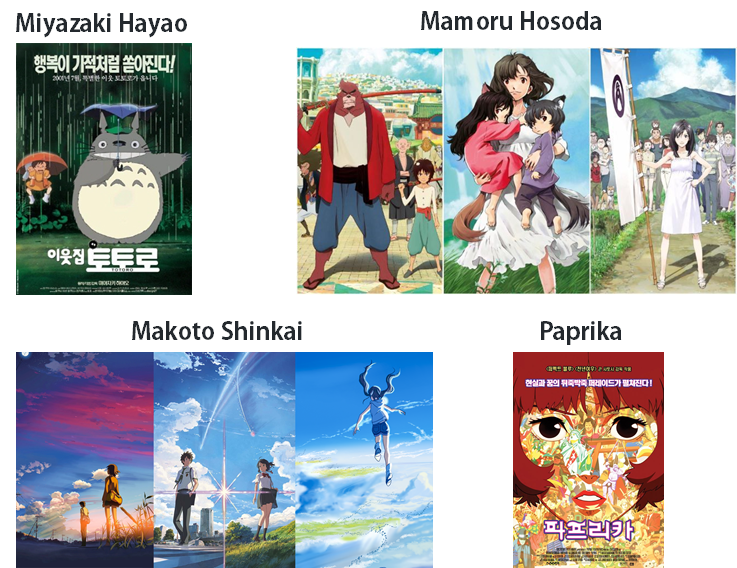

In [1]:
# 사전준비
from network.Transformer import Transformer

In [2]:
#사전 라이브러리 
import torch
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt

In [3]:
# CartoonGAN-Test-Pytorch-Torch/network/Transformer.py 에 있는 model 
model = Transformer()

In [13]:
# load_state_dict()를사용하여 어떠한 작가의 화풍을 사용할지 모색
model.load_state_dict(torch.load('pretrained_model/Hosoda_net_G_float.pth'))

<All keys matched successfully>

In [14]:
#신경망 확인
model.eval()

Transformer(
  (refpad01_1): ReflectionPad2d((3, 3, 3, 3))
  (conv01_1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
  (in01_1): InstanceNormalization()
  (conv02_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv02_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (in02_1): InstanceNormalization()
  (conv03_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv03_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (in03_1): InstanceNormalization()
  (refpad04_1): ReflectionPad2d((1, 1, 1, 1))
  (conv04_1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (in04_1): InstanceNormalization()
  (refpad04_2): ReflectionPad2d((1, 1, 1, 1))
  (conv04_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (in04_2): InstanceNormalization()
  (refpad05_1): ReflectionPad2d((1, 1, 1, 1))
  (conv05_1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (in05_1): InstanceNormalization()

torch.Size([1, 3, 600, 450])


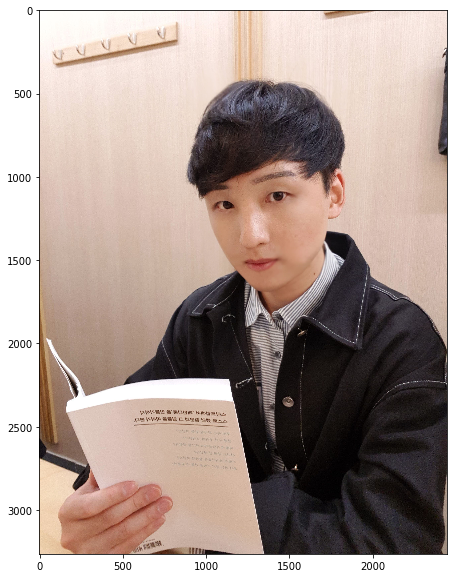

In [27]:
#불러올 이미지 사이즈 지정
img_size = 450
img_path = 'test_img/test_me.jpg'

#이미지 불러오기 
img = cv2.imread(img_path)

# 사진 전처리 함수 사용  
T = transforms.Compose([
    transforms.ToPILImage(), # numpy array -> 이미지 형식으로 전환 
    transforms.Resize(img_size), #이미지 resize  
    transforms.ToTensor() # 데이터 타입을 Tensor 형태로 변경
])

#unsqueeze()함수는 인수로 받은 위치에 새로운 차원을 삽입한다
#torch.Size([1, 3, 602, 450])
img_input = T(img).unsqueeze(0) 
print(img_input.shape)

#픽셀 컬러 전처리 단계
#기존 0 ~ 1 -> 처리 후 -1 ~ 1
#tensor(-1.)
#tensor(0.9922)
img_input = -1 + 2 *img_input

plt.figure(figsize=(16,10))
#opencv는 BGR 이기에 RGB로 전환후 출력
# ::-1 내림차순
plt.imshow(img[:,:,::-1])


C:\Users\leeyua\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


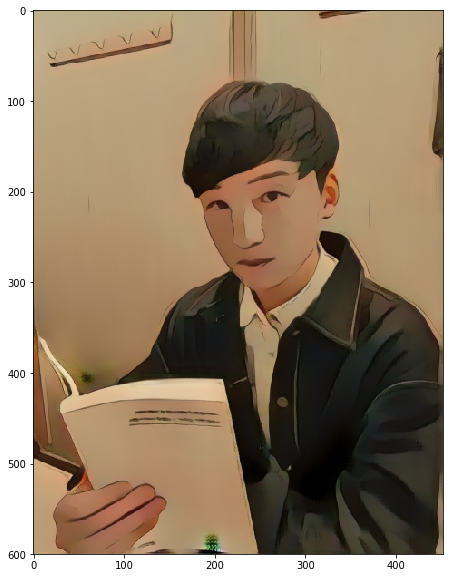

In [28]:
#신경망 모델에 이미지 삽입 후 결과 출력
img_output = model(img_input)

# 이제 정상 출력을 위해 이미지 전처리와 반대 수행 
# detach() : 연산 기록으로부터 분리(detach)하여 이후 연산들이 추적되는 것을 방지. 
# 최대값 1, 최소값 0
img_output = (img_output.squeeze().detach().numpy() +1.) / 2.

#차원 전환 : 토치(3,452,604) → matplot(604, 452, 3)
img_output = img_output.transpose([1,2,0])

#출력
plt.figure(figsize = (16,10))
plt.imshow(img_output[:,:,::-1])

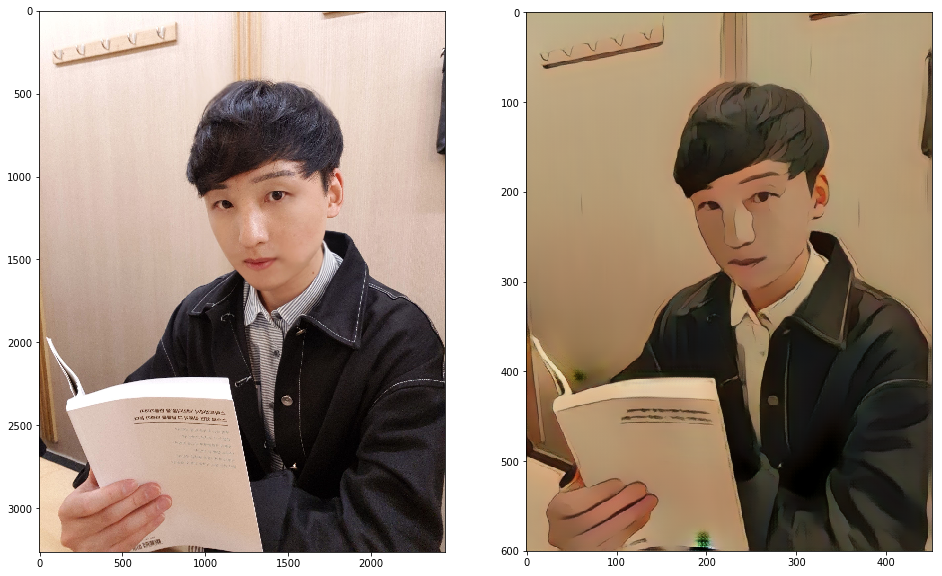

In [29]:
#원본 비교
img_output = model(img_input)

img_output = (img_output.squeeze().detach().numpy() +1.) / 2.
img_output = img_output.transpose([1,2,0])

fig, axes = plt.subplots(1,2, figsize = (16,16))

axes[0].imshow(img[:,:,::-1])
axes[1].imshow(img_output[:,:,::-1])

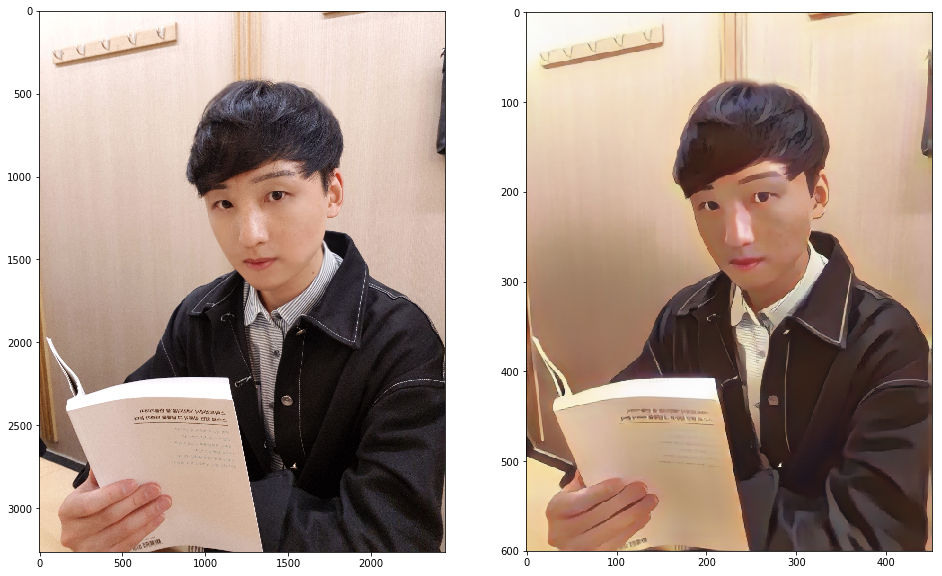

In [30]:
model.load_state_dict(torch.load('pretrained_model/Shinkai_net_G_float.pth'))
img_output = model(img_input)

img_output = (img_output.squeeze().detach().numpy() +1.) / 2.
img_output = img_output.transpose([1,2,0])

fig, axes = plt.subplots(1,2, figsize = (16,16))

axes[0].imshow(img[:,:,::-1])
axes[1].imshow(img_output[:,:,::-1])

In [32]:
model.load_state_dict(torch.load('pretrained_model/Hayao_net_G_float.pth'))
img_output = model(img_input)

img_output = (img_output.squeeze().detach().numpy() +1.) / 2.
img_output = img_output.transpose([1,2,0])

fig, axes = plt.subplots(1,2, figsize = (16,16))

axes[0].imshow(img[:,:,::-1])
axes[1].imshow(img_output[:,:,::-1])

C:\Users\leeyua\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
